In [1]:
import pandas as pd
import numpy as np

import scipy.io as sc
import scipy.stats
from scipy.fft import fft, fftfreq
from scipy.fftpack import fft, ifft 
from os import listdir
import os.path
import shutil 
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
success = True
while success:
    try:
        shutil.rmtree('corrected')
        success = False
    except:
        success = False

In [3]:
success = True
while success:
    try: 
        list_of_folders = listdir("cutting_tests_processed")
        for folder in list_of_folders:
            os.makedirs(f'corrected/{folder}')
        success = False
    except:
        success = False

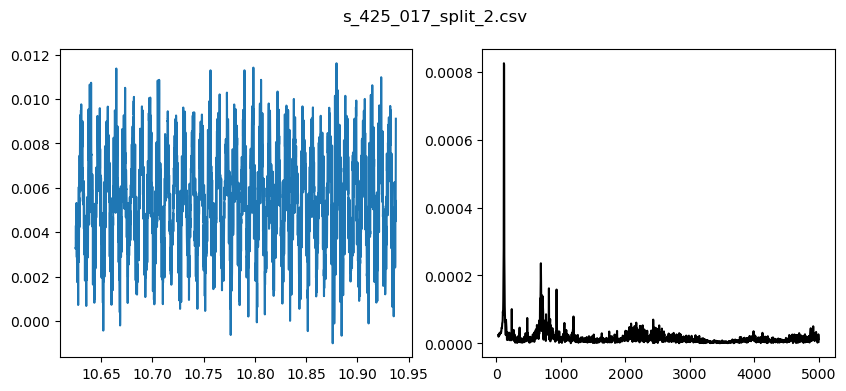

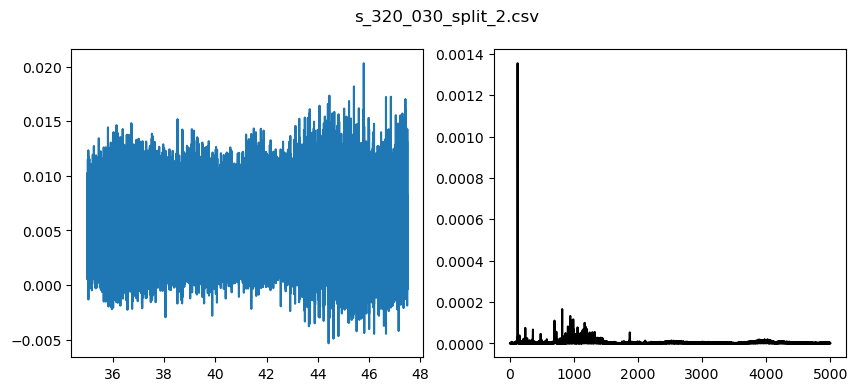

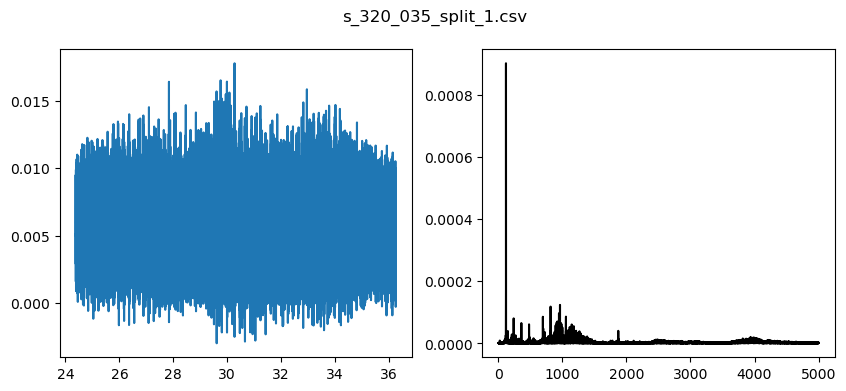

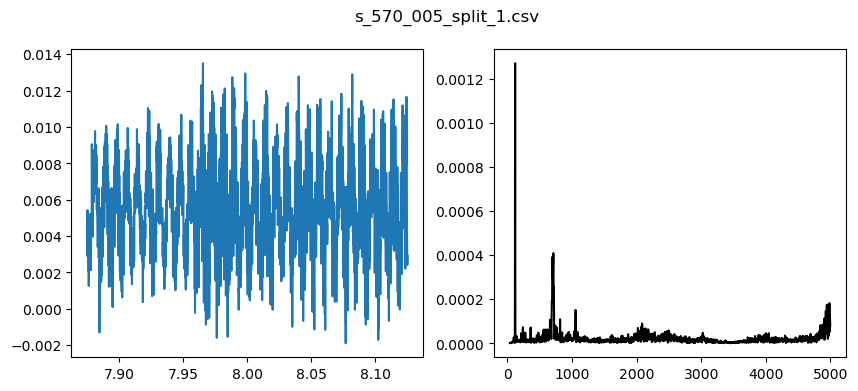

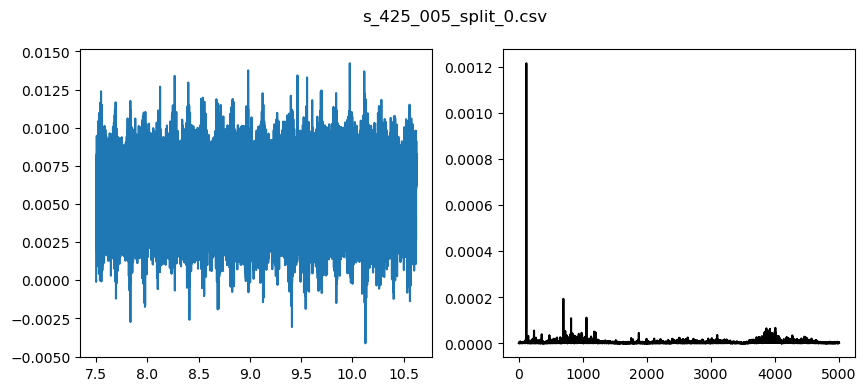

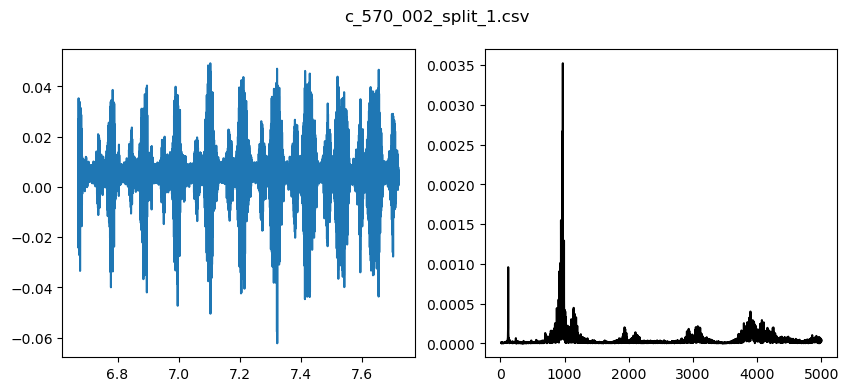

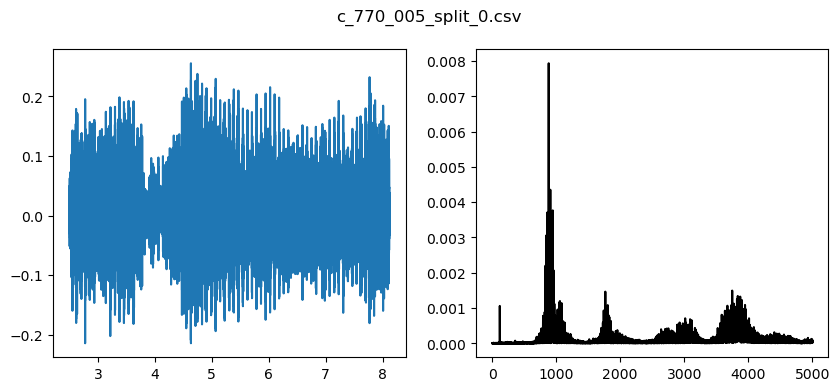

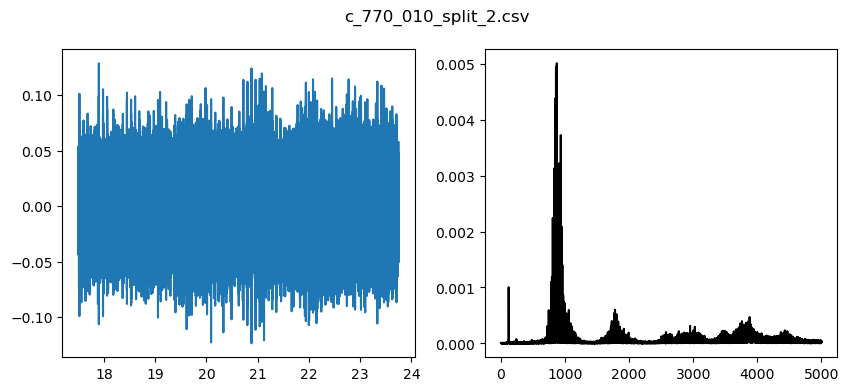

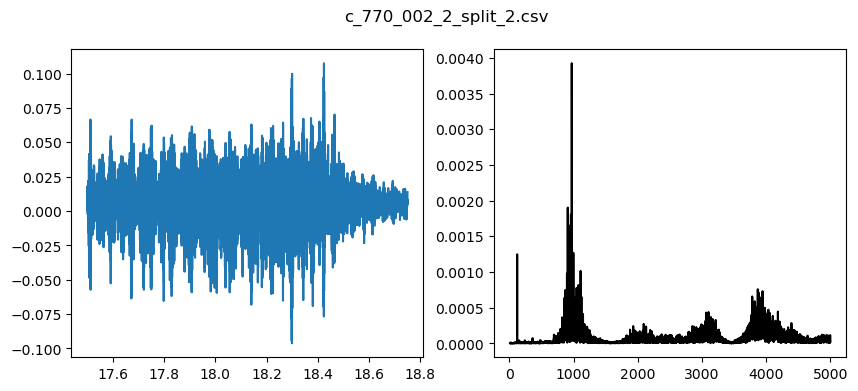

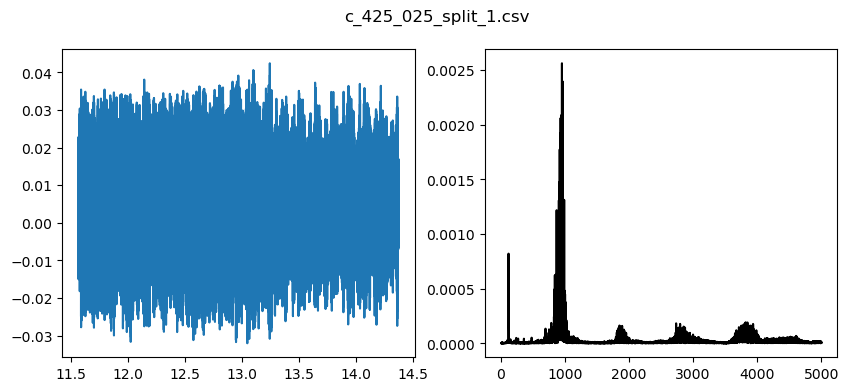

In [2]:
### Print graphs to use as references

# path = 'split_cutting_tests_processed/2inch_stickout'

# sem_chatter = [j for j in listdir(path) if j[0] == 's' and
#                                         '_noise_added' not in j]

# com_chatter = [j for j in listdir(path) if j[0] == 'c' and
#                                         '_noise_added' not in j]



# for j in range(5):
#     plot = pd.read_csv(f'{path}/{sem_chatter[j]}')
#     fig, ax = plt.subplots(1,2, figsize = (10,4))

#     ax[0].plot(plot['t'], plot['y'])
#     fft = np.fft.fft(plot['y'])
#     fftfreq = np.fft.fftfreq(len(plot['t']), plot['t'][1] - plot['t'][0])
#     ax[1].plot(fftfreq[10:int(len(fft)/2)], np.abs(fft[10:int(len(fft)/2)])/len(fft), c = 'k')
#     fig.suptitle(sem_chatter[j])


#     plt.show()

# for j in range(5):
#     plot = pd.read_csv(f'{path}/{com_chatter[j]}')
#     fig, ax = plt.subplots(1,2, figsize = (10,4))

#     ax[0].plot(plot['t'], plot['y'])
#     fft = np.fft.fft(plot['y'])
#     fftfreq = np.fft.fftfreq(len(plot['t']), plot['t'][1] - plot['t'][0])
#     ax[1].plot(fftfreq[10:int(len(fft)/2)], np.abs(fft[10:int(len(fft)/2)])/len(fft), c = 'k')
#     fig.suptitle(com_chatter[j])


#     plt.show()
    

In [3]:
def main_():
    '''
    changes the split files first letter to match it's correct classification to
    the presence of chatter according to the users input and saves the file with
    the corect name to the folder "corrected" with the same folders as 
    split_cutting_tests_processed.
    '''
    folders = listdir('split_cutting_tests_processed')
    print(folders)
    # folder = ''
    path_split = 'split_cutting_tests_processed'
    path_corrected = 'corrected'

    
    for folder in folders:
        list_of_files = listdir(f'{path_split}/{folder}') 
        for file in list_of_files:
            if file[0] != 's' and file[-5] != 'd':
                print(f'Folder: {folder}') 
                print(f'File: {file}')
                print('')

                plot = pd.read_csv(f'{path_split}/{folder}/{file}')

                # data = sc.loadmat(f'cutting_tests_processed/{folder}/{file[0:9]}.mat')
                # lim = pd.DataFrame.from_dict(data['tsDS'][:,:])
                # lim.rename({0: 't', 1: 'y'}, axis=1, inplace=True)
                # limit = np.fft.fft(lim['y']).max()

                fft = np.fft.fft(plot['y'])
                fftfreq = np.fft.fftfreq(len(plot['t']), plot['t'][1] - plot['t'][0])

                # ploting
                fig, ax = plt.subplots(1,2, figsize = (10,4))
                # plt.ylim(0,limit)
                ax[0].plot(plot['t'], plot['y'])
                ax[1].plot(fftfreq[10:len(fft)//2], np.abs(fft[10:len(fft)//2])/len(fft), c = 'k')
                fig.suptitle(file)
                plt.show()

                # classifing 
                print("c = has chatter \n s = no chatter \n \"stop\" \n \"pass\"")
                presence = input('')
                if presence == 'stop':
                    break
                if presence == 'pass':
                    continue

                # saving files
                shutil.copyfile(f'{path_split}/{folder}/{file}', f'{path_corrected}/{folder}/{presence}{file[1:]}')
                shutil.copyfile(f'{path_split}/{folder}/{file[:-4]}_noise_added.csv', f'{path_corrected}/{folder}/{presence}{file[1:-4]}_noise_added.csv')

                clear_output()


In [4]:
main_()

# Creating a new data frame with math features 

Defining the functions used in the creation of the dataframe as to keep the formulas more organized and easy to read. 

In [57]:
def thd(data_): # true harmonic distortion
    sq_sum = 0.0
    for r in range(len(data_)):
        sq_sum = sq_sum + data_[r]**2
    sq_harmonics = sq_sum - max(data_)**2
    return 100*sq_harmonics**0.5 / max(data_)

def rms(data_):
    return np.sqrt(np.mean(data_**2))

def amp(data_):
    return max(data_) - min(data_)

def SRA(data_):
    return np.mean(np.sqrt(np.abs(data_)))**2

def crest(data_):
    return max(np.abs(data_))/np.sqrt(np.mean(data_**2))

def impulse(data_):
    return max(np.abs(data_))/np.mean(abs(data_))

def margin(data_):
    return max(abs(data_))/np.mean(np.sqrt(np.abs(data_)))**2

def freq_max(data_):
    data_ = data_[100:]
    # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
    peak_freq = data_['fftfreq'][data_['fft'] == data_['fft'].max()].values[0]
#    print(peak_freq)
    return peak_freq

    
def freq_sec_highest(data_):
    # sorted(np.array(scipy.fftpack.fft(file['fftfreq'].values)))[-3]
    data_ = data_[100:]
    data_sorted = data_.sort_values(by = ['fft'], ascending = False)
    return data_sorted['fftfreq'].to_numpy()[1]

def fft_mean(data_):
    ffts_array = np.array([np.abs(complex(i)) for i in data_['fft'].to_numpy()])
    return ffts_array.mean()

# def freq_pico(data_):
#     # sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]
#     return data_['fftfreq'].max()

#         cols['freq_max'].append(scipy.fftpack.fft(file['y'].values).max()) # https://gist.github.com/endolith/255291
#         cols['freq_sec_highest'].append(sorted(np.array(scipy.fftpack.fft(file['y'].values)))[-2]) 
#         cols['freq_mean'].append(scipy.fftpack.fft(file['y'].values).mean()) 


In [58]:
''' Creating the data frame of math equations outputs.
'''
cols = {'Experiment': [],
        'chatter_presence': [],
        'med': [],
        'std': [],
        'rms': [],
        'curtose': [],
        'distortion': [],
        'amplitude': [],
        'sra': [],
        'crest': [],
        'impulse': [],
        'margin': [],
        'max': [],
        'freq_max': [],
        'freq_sec_highest': [],
        'fft_mean': []}

list_of_folders = listdir("corrected")
for folder in list_of_folders:
    list_of_files = listdir(f'corrected/{folder}')
    for file in list_of_files:
        cols['Experiment'].append(f'{file[:-4]}')
        cols['chatter_presence'].append(f'{file[:1]}')
        
        # print(file)
        file = pd.read_csv(f'corrected/{folder}/{file}', index_col=0)
                
        cols['med'].append(file['y'].mean())
        cols['std'].append(file['y'].std())
        cols['rms'].append(rms(file['y']))
        
        cols['curtose'].append(scipy.stats.kurtosis(file['y']))
        cols['distortion'].append(thd(file['y']))
        cols['amplitude'].append(amp(file['y']))
        cols['sra'].append(SRA(file['y']))
        
        cols['crest'].append(crest(file['y']))
        cols['impulse'].append(impulse(file['y']))
        cols['margin'].append(margin(file['y']))
        cols['max'].append(file['y'].max())
        
        cols['freq_max'].append(freq_max(file)) # https://gist.github.com/endolith/255291
        cols['freq_sec_highest'].append(freq_sec_highest(file)) 
        cols['fft_mean'].append(fft_mean(file))

        clear_output()

dataframe = pd.DataFrame(cols)

In [59]:
dataframe

,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,c_570_015s_split_1,c,0.005439,0.001672,0.005690,-0.345675,3629.372083,0.010763,0.005300,1.885808,1.972938,2.024487,0.010730,3545.410911,3456.348995,0.104066
1,s_570_014_split_0_noise_added,s,0.005456,0.001732,0.005724,-0.279883,5052.619381,0.012987,0.005306,2.069509,2.171051,2.232369,0.011846,-119.765954,119.765954,0.099630
2,c_570_014_split_3_noise_added,c,0.005474,0.004317,0.006971,1.507772,3065.304430,0.037364,0.005415,3.409923,3.971706,4.390281,0.023771,119.776904,-119.776904,0.190194
3,c_770_005_split_0,c,0.005442,0.002158,0.005855,0.450940,4466.879746,0.020734,0.005220,2.683527,2.878060,3.009686,0.015711,1183.457679,1038.938453,0.416852
4,c_570_015s_split_0,c,0.005440,0.001646,0.005683,-0.222662,3182.843371,0.012433,0.005301,2.150128,2.246353,2.305281,0.012220,455.975681,2122.020159,0.203897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,c_770_015_split_0_noise_added,c,0.005387,0.003704,0.006538,-0.094460,2432.020655,0.026084,0.005037,2.812935,3.261263,3.650724,0.018390,-418.088737,418.088737,0.144702
244,c_1030_002_split_1_noise_added,c,0.005390,0.008064,0.009699,-0.145349,3338.584215,0.053835,0.006998,3.086082,3.714723,4.277091,0.029931,-119.529412,119.529412,0.314640
245,s_770_010_2_split_2,s,0.005451,0.002261,0.005901,-0.884906,4170.820020,0.014411,0.005184,2.160556,2.338530,2.459102,0.012749,-3263.591889,-4441.709486,0.169307
246,c_770_010_split_2_noise_added,c,0.005413,0.003136,0.006255,0.105992,2109.262880,0.024922,0.005077,2.959701,3.336120,3.646690,0.018514,-120.327701,1830.517153,0.115366


In [60]:
dataframe.to_csv('math_outputs.csv')